<a href="https://colab.research.google.com/github/sahilutekar/Exploratory-data-analysis/blob/master/sahil_7_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis: Assignment

## Describing the dataset




### <strong> Dataset </strong>
Haberman's Survival Data

### <strong> Description </strong>
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago’s Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

### <strong> Attribute Information </strong>
*Column 1*: Age of patient at the time of operation (numerical) <br>
*Column 2*: Patient's year of operation (year 1900 - numerical)<br>
*Column 3*: Number of positive axillary nodes detected (numerical)<br>
*Column 4*: Survival status (class attribute)<br>
1 = the patient survived 5 years or longer<br>
2 = the patient died within 5 years

## Loading the dataset

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams.update({'font.size': 16})

'''IMPORTANT'''
'''download haberman.csv from the classroom and upload the dataset in the content file in the left pane of the colab'''
#Load haberman.csv into a pandas dataFrame.
data = pd.read_csv("haberman.csv")

## PART 1: Understanding the dataset

### Ques 1.1: Print the first 5 entries from the csv file
### Expected Output
<img src="https://drive.google.com/uc?id=1RykxjaDb8TZRM554d0D7fXQOeYAIfWMe">

In [ ]:
# write your code here
data.head(5)

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Ques 1.2: How many data-points and features does the dataset have?
### Expected Output :
<img src="https://drive.google.com/uc?id=1MXevQfx6TPR-2bNdm-Vfjo6Nnk3ioz60">

In [ ]:
# write your code here
data.shape

(306, 4)

### Ques 1.3: What are the column names in our dataset?
### Expected Output:
<img src="https://drive.google.com/uc?id=14BKdYffLHcMjjkCECWu__Y7z0CYTuKgm">

In [ ]:
# write your code here
data.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

### Ques 1.4: How many data-points for each class of column 'status' are present?
### Expected Output:
<img src="https://drive.google.com/uc?id=1K-J_wAXFeKCKNPJ4gX11QJZUhcJzAmk5">

In [ ]:
# write your code here
data['status'].value_counts(dropna= False)

1    225
2     81
Name: status, dtype: int64

## PART 2: Scatter Plot (2-D)

### Just run this code cell (Don't change anything)

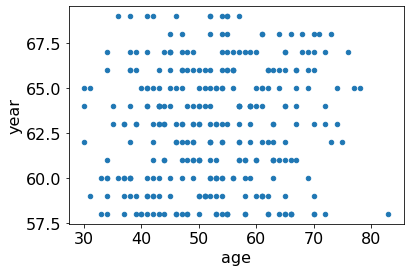

In [ ]:
# Scatter Plot without color grading

data.plot(kind='scatter', x='age', y='year');
plt.show()

# OBSERVATION: Both the classes are of same color (blue) and thus cannot make much sense.

### Ques 2.1: Color the points by their class-label/status-type
### Expected Output:
<img src="https://drive.google.com/uc?id=1-O5pmCh8ULRFD6O93I6po00jZ4tt6L2v">

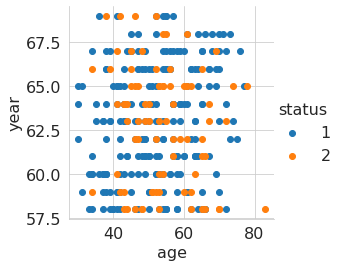

In [ ]:
# Write your code here

'''HINT: Use hue dimension of the Grid'''
sns.set_style("whitegrid")
sns.FacetGrid(data, hue='status', height=4) \
   .map(plt.scatter, 'age', 'year') \
   .add_legend()
plt.show();

### Ques 2.2: Make 2 separate plots each of only 1 status-type in column dimension of the grid

### Expected Output:
<img src="https://drive.google.com/uc?id=1GEMTyvff7VZOp8Fb_QnF3I43cQMxPO7V">

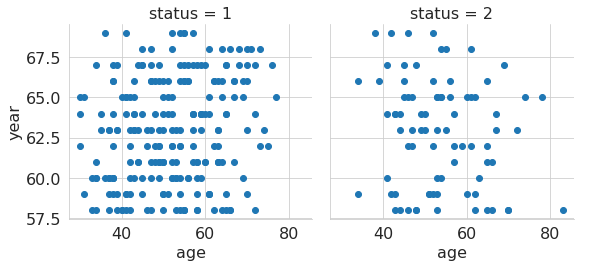

In [ ]:
# write your code here
sns.set_style("whitegrid")
sns.FacetGrid(data, col='status', height=4) \
   .map(plt.scatter, 'age', 'year') \
   .add_legend()
plt.show();

## PART 3: Pair Plots

### Ques 3.1: Plot the pairwise scatter plot with hue dimension of the grid
### Expected Output:
<img src = "https://drive.google.com/uc?id=1XXJP-HryE4fn_JMF_xF65ChQoYb-GqNV">

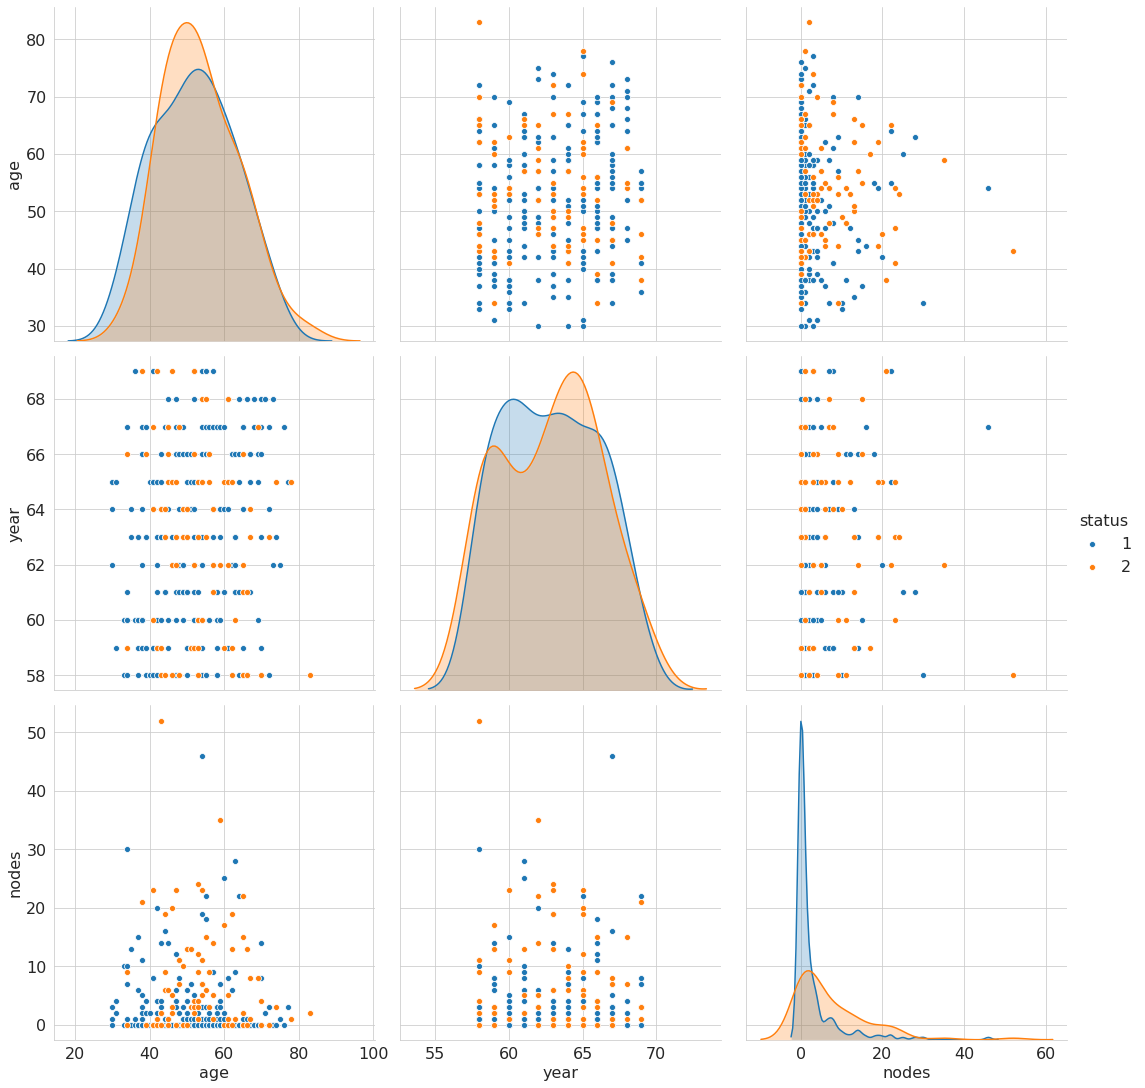

In [ ]:
# write your code here
plt.close();
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', height=5);
plt.show()

## PART 4: PDF and CDF

### Ques 4.1: Show the density plot with respect to the 'year' feature in 'row dimension' of the grid. 
### Expected Output:
<img src = "https://drive.google.com/uc?id=1ixzZtvNljsAUJtVrflbjQnD3ZfSulpl9">

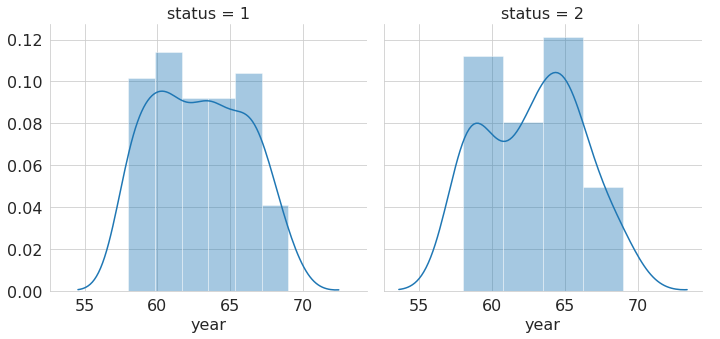

In [ ]:
# write your code here
sns.set_style("whitegrid")
sns.FacetGrid(data, col='status', height=5) \
   .map(sns.distplot, 'year') \
   .add_legend()
plt.show();

### Ques 4.2: Plot the CDF and PDF of 'age' of patients who died within 5 years.
### Expected Output:
<img src = "https://drive.google.com/uc?id=1xoxJnLVewz5BKbcc9W_6bp2lipCAalR1">

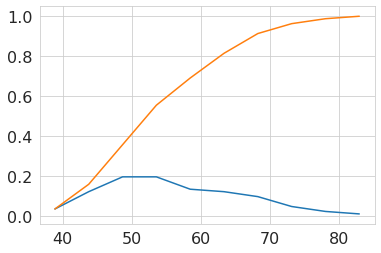

In [ ]:
# write your code here
df = data[data['status'] == 2]
counts, bin_edges = np.histogram(df['age'], bins=10,density=True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.show()

### Ques 4.3: What percentage of people who died were less than 55 years old.
### Expected Output:
<img src = "https://drive.google.com/uc?id=1sj53wEkl4-ZLKYTOr3qcGUFoLcE1sqz2">

In [ ]:
# write your code here
df = data[data['status'] == 2]
df1 = df[df['age'] < 55]
a = df.shape[0]
b = df1.shape[0]
c = round(b/a*100)
print(f'percentage_dead_under_55 = {c}')

percentage_dead_under_55 = 60
